In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [40]:
data = pd.read_csv('/content/MensT20wcdata.csv',encoding='latin-1')
data.head()

,Match_id,Team_1,Team_2,Venue,Stage,Toss_winner,Toss_decision,Score_of_first_innings,Wkts_in_first_innings,Score_of_second_innings,Wkts_in_second_innings,Winner,Won by,Player_of_the_match
0,1,Namibia,Sri Lanka,"GMHBA Stadium, South Geelong, Victoria",First Round,Sri Lanka,Field,163,7,108,10,Namibia,55 Runs,Jan Frylinck
1,2,UAE,Netherlands,"GMHBA Stadium, South Geelong, Victoria",First Round,UAE,Bat,111,8,112,7,Netherlands,3 Wickets,Bas de Leede
2,3,Scotland,West Indies,"Bellerive Oval, Hobart",First Round,West Indies,Field,160,5,118,10,Scotland,42 Runs,George Munsey
3,4,Zimbave,Ireland,"Bellerive Oval, Hobart",First Round,Ireland,Field,174,7,143,9,Zimbave,31 Runs,Sikandar Raza
4,5,Namibia,Netherlands,"GMHBA Stadium, South Geelong, Victoria",First Round,Namibia,Bat,121,6,122,5,Netherlands,5 Wickets,\nBas de Leede


In [41]:
data.shape

(45, 14)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Match_id                 45 non-null     int64 
 1   Team_1                   45 non-null     object
 2   Team_2                   45 non-null     object
 3                Venue       45 non-null     object
 4   Stage                    45 non-null     object
 5   Toss_winner              45 non-null     object
 6   Toss_decision            45 non-null     object
 7   Score_of_first_innings   45 non-null     object
 8   Wkts_in_first_innings    45 non-null     object
 9   Score_of_second_innings  45 non-null     object
 10  Wkts_in_second_innings   45 non-null     object
 11  Winner                   45 non-null     object
 12  Won by                   45 non-null     object
 13  Player_of_the_match      45 non-null     object
dtypes: int64(1), object(13)
memory usage: 5.0+ K

In [43]:
data.columns

Index(['Match_id', 'Team_1', 'Team_2', '             Venue', 'Stage',
       'Toss_winner', 'Toss_decision', 'Score_of_first_innings',
       'Wkts_in_first_innings', 'Score_of_second_innings',
       'Wkts_in_second_innings', 'Winner', 'Won by', 'Player_of_the_match'],
      dtype='object')

In [44]:
data.describe()

,Match_id
count,45.000000
mean,23.000000
std,13.133926
min,1.000000
25%,12.000000
50%,23.000000
75%,34.000000
max,45.000000


In [45]:
data.isnull().sum()

Match_id                   0
Team_1                     0
Team_2                     0
             Venue         0
Stage                      0
Toss_winner                0
Toss_decision              0
Score_of_first_innings     0
Wkts_in_first_innings      0
Score_of_second_innings    0
Wkts_in_second_innings     0
Winner                     0
Won by                     0
Player_of_the_match        0
dtype: int64

In [46]:
data['Score_of_first_innings'] = pd.to_numeric(data['Score_of_first_innings'], errors='coerce')

# Calculate average score of first innings
average_score = data.groupby('Team_1')['Score_of_first_innings'].mean()
print("Average Score of First Innings:")
print(average_score)

Average Score of First Innings:
Team_1
Afghanistan     128.000000
Australia       173.500000
Bangladesh      140.333333
England         158.000000
India           170.000000
Ireland         142.500000
Namibia         142.000000
Netherlands     124.500000
New Zealand     176.000000
Pakistan        172.000000
Scotland        156.000000
South Africa    205.000000
Sri Lanka       153.000000
UAE             129.500000
West Indies     149.500000
Zimbave         125.000000
Name: Score_of_first_innings, dtype: float64


In [78]:
team_wins = data[data['Winner'] == 'Bangladesh']
print("Matches won by Bangladesh:")
print(team_wins)

Matches won by Bangladesh:
    Match_id      Team_1        Team_2                   Venue  Stage  \
16        17  Bangladesh  Netherlands   Bellerive Oval, Hobart  Group   
27        28  Bangladesh       Zimbave     The Gabba, Brisbane  Group   

    Toss_winner Toss_decision  Score_of_first_innings Wkts_in_first_innings  \
16  Netherlands         Field                   144.0                     8   
27   Bangladesh           Bat                   150.0                     7   

    Score_of_second_innings Wkts_in_second_innings      Winner  Won by  \
16                    135.0                     10  Bangladesh     9.0   
27                    147.0                      8  Bangladesh     3.0   

   Player_of_the_match  
16        Taskin Ahmed  
27        Taskin Ahmed  


In [79]:
team_wins = data[data['Winner'] == 'England']
print("Matches won by England:")
print(team_wins)

Matches won by England:
    Match_id       Team_1       Team_2                                Venue  \
13        14  Afghanistan      England                 Perth Stadium, Perth   
32        33      England  New Zealand                  The Gabba, Brisbane   
38        39    Sri Lanka      England        Sydney Cricket Ground, Sydney   
43        44        India      England              Adelaide Oval, Adelaide   
44        45      England     Pakistan  Melbourne Cricket Ground, Melbourne   

         Stage Toss_winner Toss_decision  Score_of_first_innings  \
13       Group     England         Field                   112.0   
32       Group     England           Bat                   179.0   
38       Group   Sri Lanka           Bat                   141.0   
43  Semi Final     England         Field                   168.0   
44       Final     England         Field                   137.0   

   Wkts_in_first_innings  Score_of_second_innings Wkts_in_second_innings  \
13              

Text(0, 0.5, 'Number of Matches')

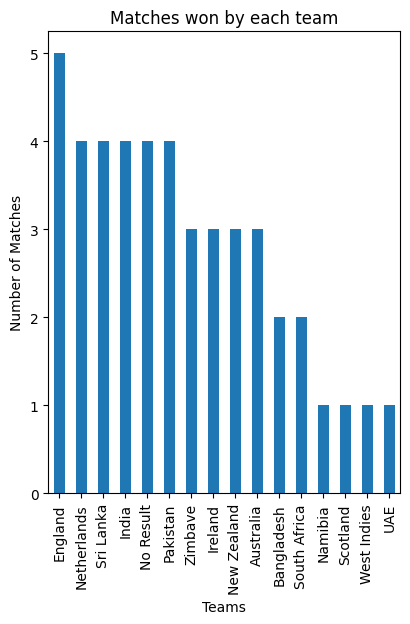

In [53]:
# Visualization
plt.figure(figsize=(10, 6))

# Bar plot of matches won by each team
plt.subplot(1, 2, 1)
data['Winner'].value_counts().plot(kind='bar')
plt.title('Matches won by each team')
plt.xlabel('Teams')
plt.ylabel('Number of Matches')


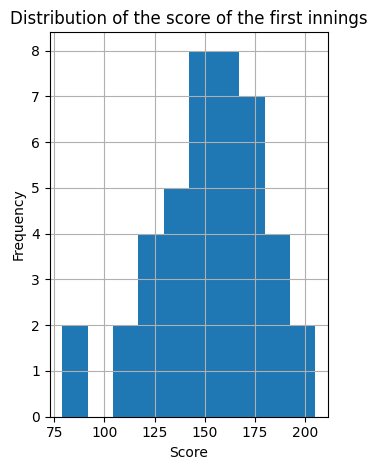

In [54]:
# Histogram of the score of the first innings
plt.subplot(1, 2, 2)
data['Score_of_first_innings'].hist(bins=10)
plt.title('Distribution of the score of the first innings')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjusting the spacing between subplots

plt.show()

In [56]:
# Calculate winning percentage by team
team_wins = data['Winner'].value_counts()
total_matches = data['Team_1'].value_counts() + data['Team_2'].value_counts()
winning_percentage = (team_wins / total_matches) * 100


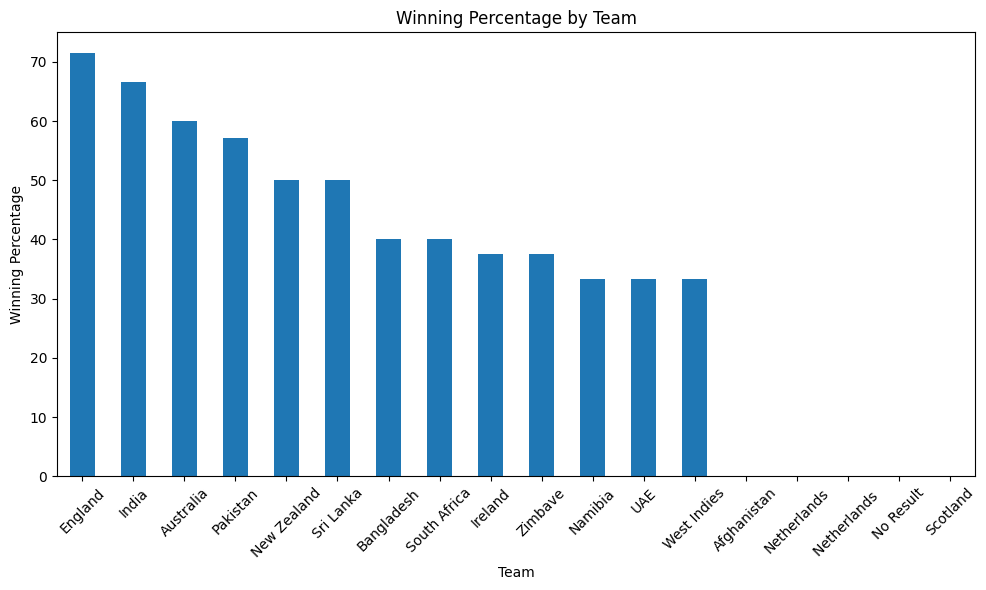

In [57]:
# Sort by winning percentage in descending order
winning_percentage = winning_percentage.sort_values(ascending=False)

# Bar plot of winning percentage by team
plt.figure(figsize=(10, 6))
winning_percentage.plot(kind='bar')
plt.title('Winning Percentage by Team')
plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

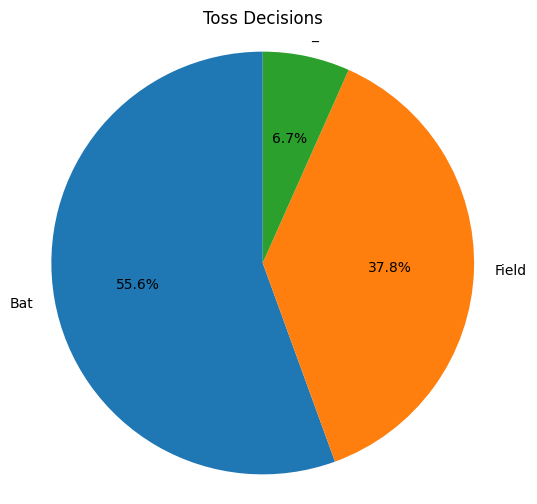

In [58]:
# Count of toss decisions
toss_decisions = data['Toss_decision'].value_counts()

# Pie chart of toss decisions
plt.figure(figsize=(6, 6))
plt.pie(toss_decisions, labels=toss_decisions.index, autopct='%1.1f%%', startangle=90)
plt.title('Toss Decisions')
plt.axis('equal')
plt.show()

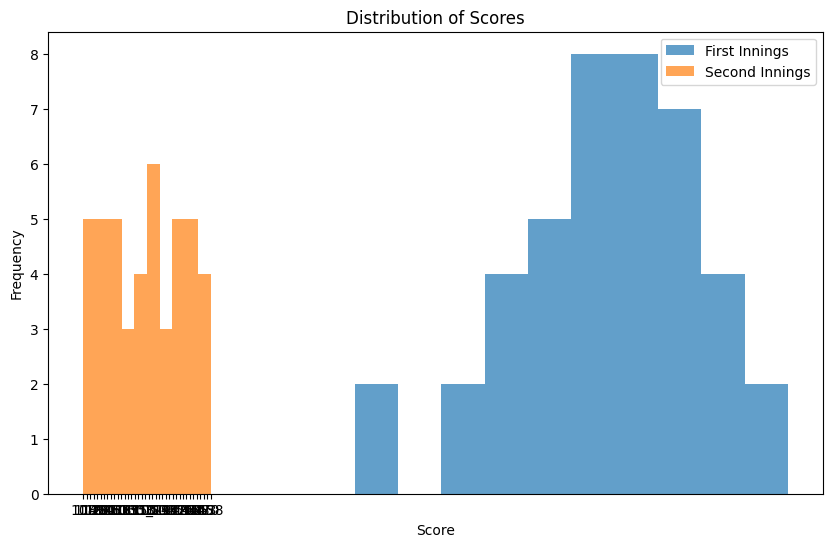

In [59]:
# Histogram of score distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Score_of_first_innings'], bins=10, alpha=0.7, label='First Innings')
plt.hist(data['Score_of_second_innings'], bins=10, alpha=0.7, label='Second Innings')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [85]:
print("Top 10 Players of the Match:")
top_players = data['Player_of_the_match'].value_counts().head(10)
print(top_players)

Top 10 Players of the Match:
_                   4
Sikandar Raza       3
Suryakumar Yadav    2
Sam Curran          2
Taskin Ahmed        2
Kusal Mendis        2
Virat Kohli         2
Shadab Khan         2
Lungi Ngidi         1
Aaron Finch         1
Name: Player_of_the_match, dtype: int64


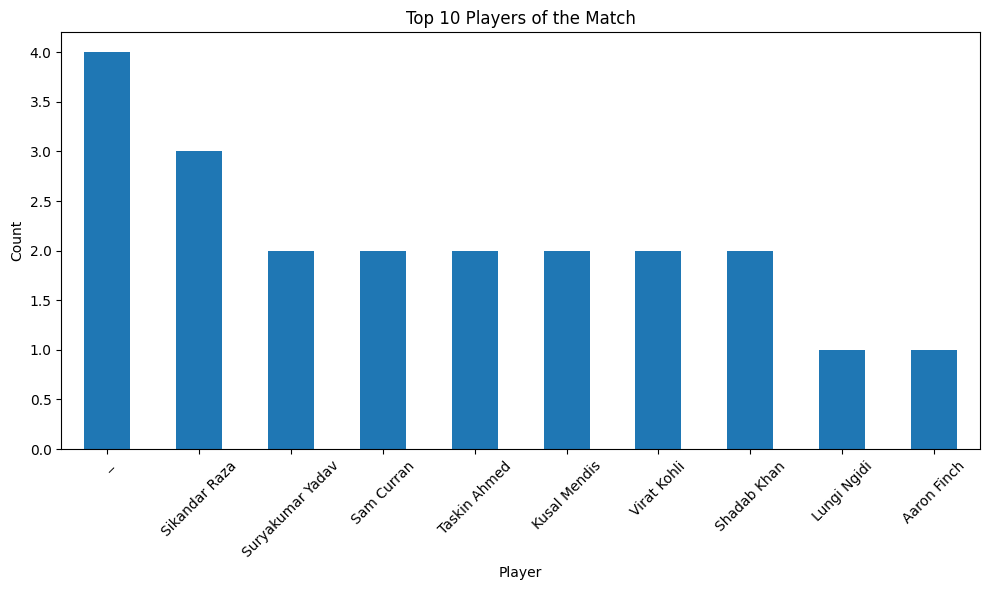

In [77]:
# Top 10 players with most "Player of the Match" awards
top_players = data['Player_of_the_match'].value_counts().head(10)

# Bar plot of top players with most "Player of the Match" awards
plt.figure(figsize=(10, 6))
top_players.plot(kind='bar')
plt.title('Top 10 Players of the Match')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

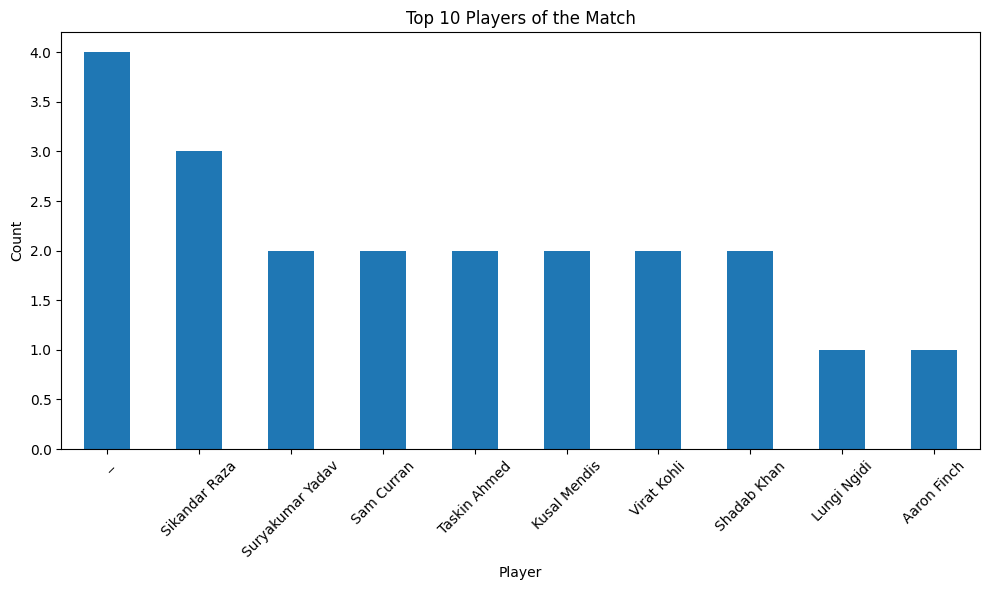

In [61]:
# Top 10 players with most "Player of the Match" awards
top_players = data['Player_of_the_match'].value_counts().head(10)

# Bar plot of top players with most "Player of the Match" awards
plt.figure(figsize=(10, 6))
top_players.plot(kind='bar')
plt.title('Top 10 Players of the Match')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

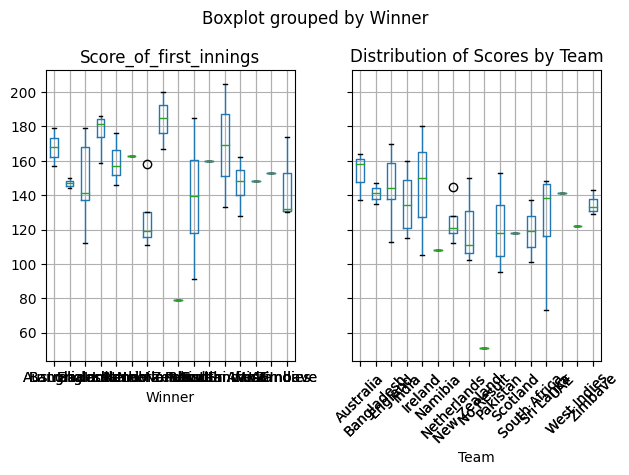

In [65]:
# Convert 'Score_of_first_innings' and 'Score_of_second_innings' columns to numeric
data['Score_of_first_innings'] = pd.to_numeric(data['Score_of_first_innings'], errors='coerce')
data['Score_of_second_innings'] = pd.to_numeric(data['Score_of_second_innings'], errors='coerce')

# Box plot of scores by team
plt.figure(figsize=(10, 6))
data.boxplot(column=['Score_of_first_innings', 'Score_of_second_innings'], by='Winner')
plt.title('Distribution of Scores by Team')
plt.xlabel('Team')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

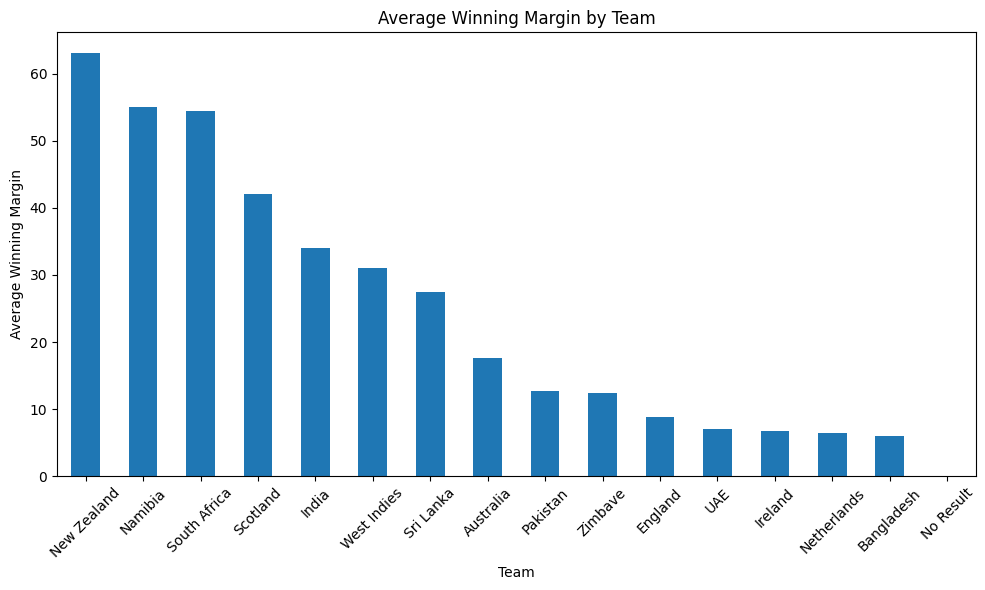

In [69]:
# Clean 'Won by' column by removing non-numeric characters
data['Won by'] = data['Won by'].str.extract('(\d+)').astype(float)

# Group by winning team and calculate the average winning margin
winning_margin = data.groupby('Winner')['Won by'].mean().sort_values(ascending=False)

# Bar plot of average winning margin by team
plt.figure(figsize=(10, 6))
winning_margin.plot(kind='bar')
plt.title('Average Winning Margin by Team')
plt.xlabel('Team')
plt.ylabel('Average Winning Margin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

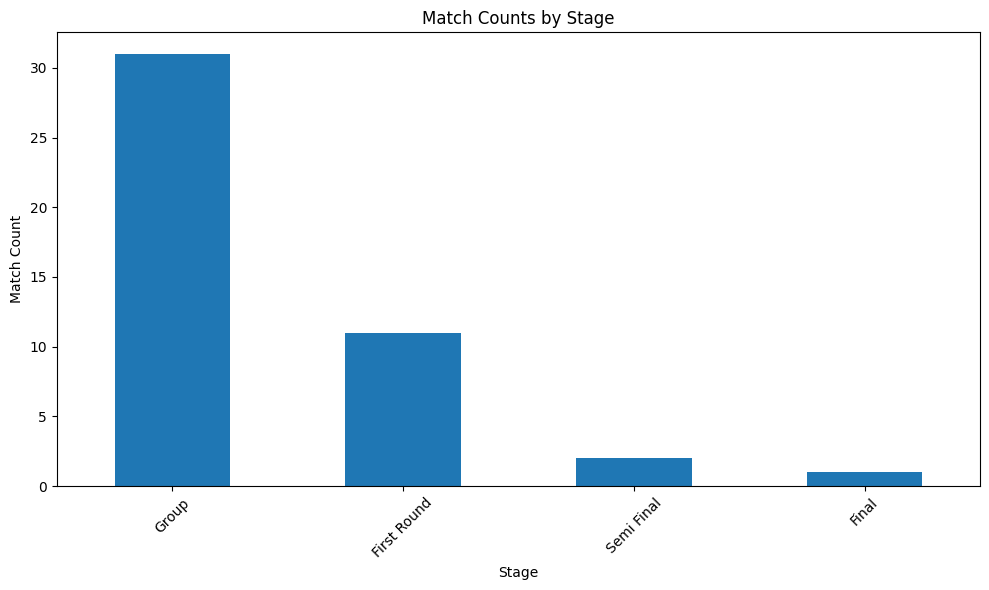

In [67]:
# Count of matches by stage
stage_counts = data['Stage'].value_counts()

# Bar plot of match counts by stage
plt.figure(figsize=(10, 6))
stage_counts.plot(kind='bar')
plt.title('Match Counts by Stage')
plt.xlabel('Stage')
plt.ylabel('Match Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x600 with 0 Axes>

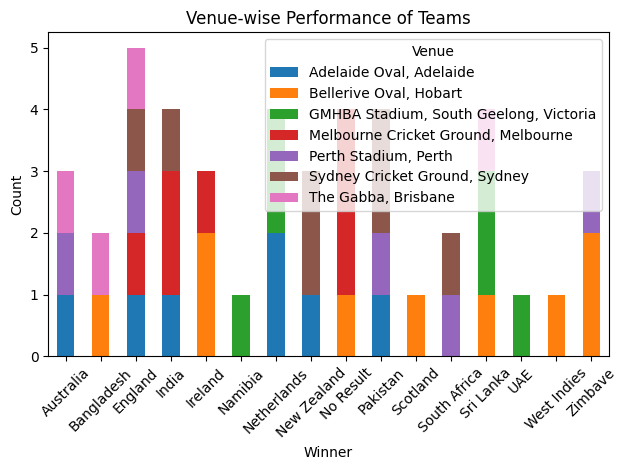

In [76]:
# Rename the column to remove leading whitespaces
data = data.rename(columns=lambda x: x.strip())

# Access the 'Venue' column
venues = data['Venue']
# Count of matches won by each team at each venue
venue_wins = pd.crosstab(data['Winner'], data['Venue'])

# Bar plot of venue-wise performance of teams
plt.figure(figsize=(12, 6))
venue_wins.plot(kind='bar', stacked=True)
plt.title('Venue-wise Performance of Teams')
plt.xlabel('Winner')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

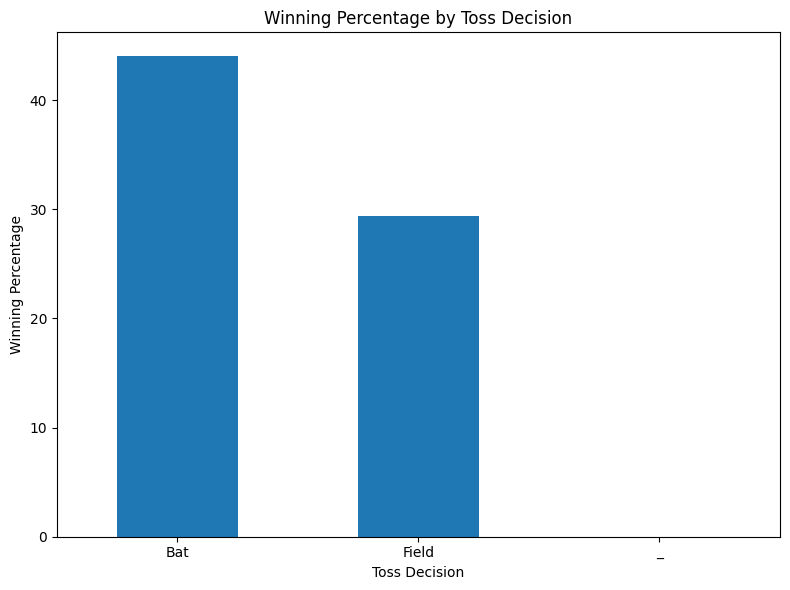

In [68]:
# Count of toss decisions
toss_decisions = data['Toss_decision'].value_counts()

# Count of matches won by toss decision
matches_won_by_toss_decision = data[data['Winner'] == data['Toss_winner']]['Toss_decision'].value_counts()

# Calculate winning percentage by toss decision
winning_percentage = (matches_won_by_toss_decision / toss_decisions) * 100

# Bar plot of winning percentage by toss decision
plt.figure(figsize=(8, 6))
winning_percentage.plot(kind='bar')
plt.title('Winning Percentage by Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()